In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [3]:
bank_df = pd.read_csv("../../Data/Bank Customer Churn/Churn_Modelling.csv", header=0)
bank_df = bank_df.drop(['RowNumber','Surname',"CustomerId"],axis=1)

In [4]:
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [5]:
for c_name in bank_df.columns.to_list():
    na_count = bank_df[c_name].isna().sum()
    if(na_count>0):
        print(f"{c_name} has {bank_df[c_name].isna().sum()}")

Geography has 1
Age has 1
HasCrCard has 1
IsActiveMember has 1


In [6]:
bank_df = bank_df.dropna()

In [7]:
bank_df.shape

(9998, 11)

In [8]:
obj_cols = []
for dtype,c_name in zip(bank_df.dtypes.to_list(),bank_df.columns.to_list()):
    if(dtype == "object"):
        print(f"{c_name} is of type {dtype}")
        obj_cols.append(c_name)

Geography is of type object
Gender is of type object


In [9]:
obj_cols

['Geography', 'Gender']

In [10]:
for c_name in obj_cols:
    print(c_name)
    print(bank_df[c_name].value_counts())

Geography
Geography
France     5012
Germany    2510
Spain      2476
Name: count, dtype: int64
Gender
Gender
Male      5455
Female    4543
Name: count, dtype: int64


In [11]:
bank_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
bank_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
def grouped_mean(c_name):
    temp = bank_df.groupby(c_name)["Exited"].transform("mean")   
    return temp

In [14]:
for c_name in obj_cols:
    bank_df[c_name] = grouped_mean(c_name)

In [15]:
bank_df[obj_cols]

,Geography,Gender
0,0.161612,0.250715
1,0.166801,0.250715
2,0.161612,0.250715
3,0.161612,0.250715
5,0.166801,0.164803
...,...,...
9997,0.161612,0.250715
9998,0.324701,0.164803
9999,0.324701,0.164803
10000,0.161612,0.250715


In [16]:
bank_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<Axes: ylabel='Balance'>

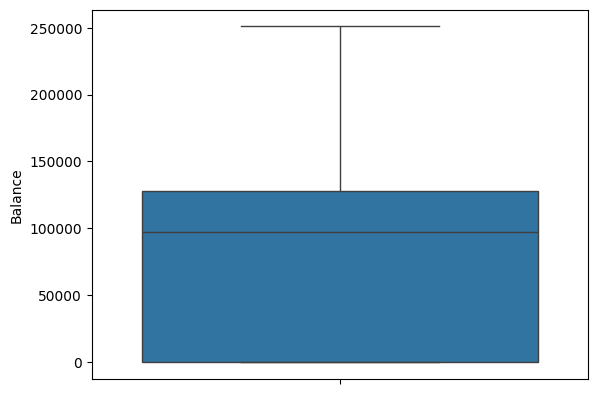

In [17]:
sns.boxplot(bank_df["Balance"])

In [18]:
bank_df[["Balance","CreditScore"]]

,Balance,CreditScore
0,0.00,619
1,83807.86,608
2,159660.80,502
3,0.00,699
5,113755.78,645
...,...,...
9997,0.00,709
9998,75075.31,772
9999,75075.31,772
10000,130142.79,792


In [19]:
co = ['CreditScore','Age','Balance','EstimatedSalary']

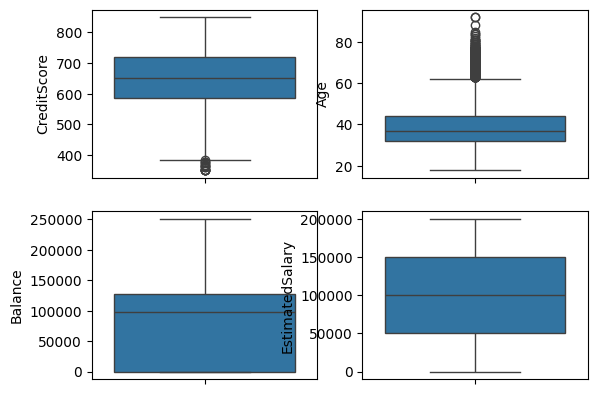

In [20]:
index = 0
fig , ax = plt.subplots(2,2)
for axes in ax:
    for axx in axes:
        sns.boxplot(bank_df[co[index]], ax=axx)
        index+=1

In [21]:
import numpy as np
def treat_outlier(df):
    Q3 = np.quantile(df, 0.75)
    Q1 = np.quantile(df, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    df[df>upper_range] = upper_range
    df[df<lower_range] = lower_range
    return df

In [22]:
bank_df['Age'] = treat_outlier(bank_df['Age'])
bank_df['CreditScore'] = treat_outlier(bank_df['CreditScore'])

<Axes: >

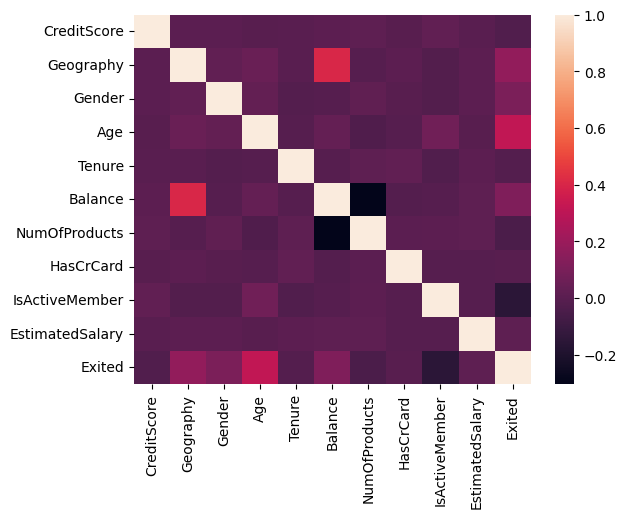

In [23]:
sns.heatmap(bank_df.corr())

In [24]:
X , y = bank_df.drop("Exited", axis=1) , bank_df['Exited']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train , X_test , y_train , y_test = train_test_split(X,y)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt_classifier = DecisionTreeClassifier(random_state=10, max_depth=5)

In [29]:
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=10)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
predicted = dt_classifier.predict(X_test)

In [32]:
accuracy_score(y_pred=predicted,y_true=y_test)

0.8548

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_classifier = RandomForestClassifier(random_state=10, max_depth=4,n_estimators=8)
rf_classifier.fit(X_train,y_train)
print(accuracy_score(y_pred=rf_classifier.predict(X_test),y_true=y_test))
print(accuracy_score(y_pred=rf_classifier.predict(X_train),y_true=y_train))

0.8408
0.8428914377167245


In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
ada_classifier = AdaBoostClassifier(random_state=10,n_estimators=8)
ada_classifier.fit(X_train,y_train)
print(accuracy_score(y_pred=ada_classifier.predict(X_test),y_true=y_test))
print(accuracy_score(y_pred=ada_classifier.predict(X_train),y_true=y_train))

0.8508
0.8515604161109629


c:\Users\Palke\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
gd_classifier = GradientBoostingClassifier(random_state=10,n_estimators=120)
gd_classifier.fit(X_train,y_train)
print(accuracy_score(y_pred=gd_classifier.predict(X_test),y_true=y_test))
print(accuracy_score(y_pred=gd_classifier.predict(X_train),y_true=y_train))

0.8608
0.875433448919712


In [39]:
import xgboost as xgb

In [40]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [41]:
n=50
params = {
	'objective': 'binary:logistic',
	'max_depth': 3,
	'learning_rate': 0.1,
}

model = xgb.train(params=params,dtrain=xgb_train,num_boost_round=1)


In [42]:
preds = model.predict(xgb_test)
preds = preds.astype(int)
accuracy= accuracy_score(y_test,preds)
print('Accuracy of the model is:', accuracy*100)


Accuracy of the model is: 79.75999999999999
